In [1]:
pip install split-folders

In [2]:
import splitfolders

In [3]:
input_file='/content/drive/MyDrive/Data Set/DTA SET 2'
output_file='/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED'

In [4]:
splitfolders.ratio(input_file,output=output_file,seed=38,ratio=(0.80,0.20),group_prefix=None)

Copying files: 3959 files [09:38,  6.84 files/s]


In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED/train'
valid_path = '/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED/val'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED/train/*')

In [10]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [13]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3156 images belonging to 30 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Data Set/DTA SET 2 SPLITTED/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 803 images belonging to 30 classes.


In [17]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
99/99 [==============================] - 618s 6s/step - loss: 6.5862 - accuracy: 0.5402 - val_loss: 2.5849 - val_accuracy: 0.6936
Epoch 2/10
99/99 [==============================] - 609s 6s/step - loss: 1.7393 - accuracy: 0.7947 - val_loss: 2.2862 - val_accuracy: 0.7534
Epoch 3/10
99/99 [==============================] - 629s 6s/step - loss: 1.1031 - accuracy: 0.8666 - val_loss: 1.3647 - val_accuracy: 0.8319
Epoch 4/10
99/99 [==============================] - 621s 6s/step - loss: 0.8172 - accuracy: 0.8986 - val_loss: 1.7673 - val_accuracy: 0.8219
Epoch 5/10
99/99 [==============================] - 621s 6s/step - loss: 0.8693 - accuracy: 0.9027 - val_loss: 1.9740 - val_accuracy: 0.8182
Epoch 6/10
99/99 [==============================] - 621s 6s/step - loss: 0.9081 - accuracy: 0.9046 - val_loss: 2.1451 - val_accuracy: 0.8132
Epoch 7/10
99/99 [==============================] - 593s 6s/step - loss: 0.7671 - accuracy: 0.9179 - val_loss: 2.8766 - val_accuracy: 0.8107
Epoch 8/10
99

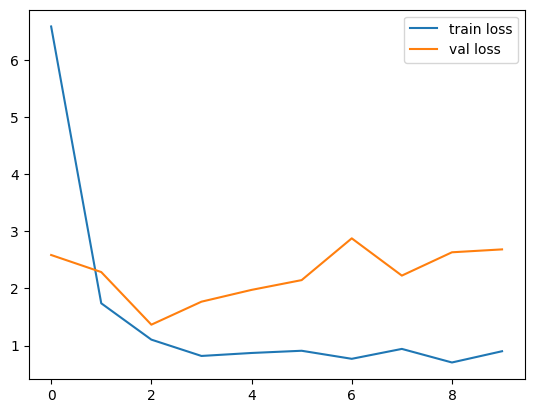

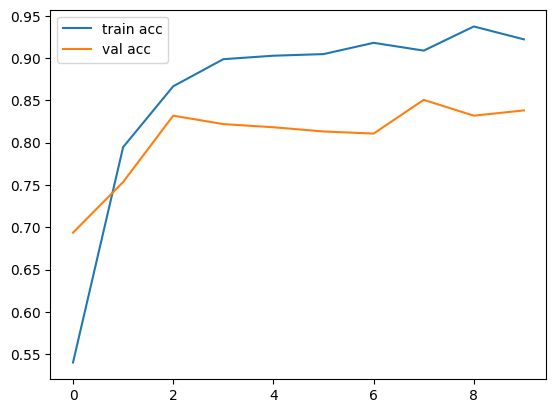

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
model.save('/content/drive/My Drive/last_try.h5')

In [23]:
model.save('/content/drive/My Drive/last_try.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
